### CS/ECE/ISyE 524 &mdash; Introduction to Optimization &mdash; Spring 2019 ###

# Stock Trading Optimization#

#### Jacob Makola (makola@wisc.edu), Finley Myers (fmyers@wisc.edu), Aaron (email address), and Lucas Laibly (laibly@wisc.edu)

*****

### Table of Contents

1. [Introduction](#1.-Introduction)
1. [General Model](#2.-General)
     1. [Mathematical Model](#9.-Mathematical)
     1. [Solution](#b.-Solution)
     1. [Results](#c.-Results)
1. [Moving Average](#3.-General)
     1. [Mathematical Model](#a.-Mathematical)
     1. [Solution](#b.-Solution)
     1. [Results](#c.-Results)
1. [Regularization](#4.-Results-and-discussion)
    1. [Mathematical Model](#a.-Mathematical)
    1. [Solution](#b.-Solution)
    1. [Results](#c.-Results)
1. [Conclusion](#5.-Conclusion)

## 1. Introduction ##

The first few sentences should give a quick overview of the entire project. Then, elaborate with a description of the problem that will be solved, a brief history (with [citations](https://en.wikipedia.org/wiki/Citation) where appropriate) of how the problem came about, why it's important/interesting, and any other interesting facts you'd like to talk about. You should address and explain where the problem data is coming from (research? the internet? synthetically generated? something you have collected personally, or by surveying your friends?) Also give an outline of the rest of the report.

This section should be 300-600 words long, and **should be accessible to a general audience** (don't assume your reader has taken the class!). Although you should include references, you should also make sure that it is possible to understand the main ideas of the project and the context without clicking on any of the links or reading any of the references. Feel free to include images if you think it'll be helpful:

![fixit flowchart][flow]

For more help on using Markdown, see [this reference](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet).

[flow]: https://s-media-cache-ak0.pinimg.com/736x/f5/75/c5/f575c53b93724808c6f0211890a54900.jpg

## 2. General Model ##


A discussion of the modeling assumptions made in the problem (e.g. is it from physics? economics? something else?). Explain the decision variables, the constraints, and the objective function. Finally, show the optimization problem written in standard form. Discuss the model type (LP, QP, MIP, etc.). Equations should be formatted in $\LaTeX$ within the IJulia notebook. For this section you may **assume the reader is familiar with the material covered in class**.

Here is an example of an equation:

$$
\begin{bmatrix}
  1 & 2 \\
  3 & 4
\end{bmatrix}
\begin{bmatrix} x \\ y \end{bmatrix} =
\begin{bmatrix} 5 \\ 6 \end{bmatrix}
$$

And here is an example of an optimization problem in standard form:

$$
\begin{aligned}
\underset{x \in \mathbb{R^n}}{\text{maximize}}\qquad& f_0(x) \\
\text{subject to:}\qquad& f_i(x) \le 0 && i=1,\dots,m\\
& h_j(x) = 0 && j=1,\dots,r
\end{aligned}
$$

For some quick tips on using $\LaTeX$, see [this cheat sheet](http://users.dickinson.edu/~richesod/latex/latexcheatsheet.pdf).
## a. Mathematical Model ##

## b. Solution ##


## c. Results ##

## 3. Moving Average and Autoregressive Models##

This portion of the project focuses on two different models, moving average and autoregressive, that give a trader insight on when to buy and sell stocks. As oppossed to a general problem, where we scheduled buying and selling stocks based upon previous price information, both of these models **do not rely on the knowledge of the complete future state**. For example, in our moving average model, we used opening prices as inputs to predict closing prices for Amazon stock. Furthermore, the autoregressive model relies on every past entry, so we used past prices to predict closing prices for Amazon stock.

Both of these models can be used to analyze market trends in order to buy and sell stocks at a specific time. More information on when to buy and sell is given in the results section below.







In [15]:
"""Below is code to import Amazon stock data for March 2019"""

using CSV;
raw = CSV.read("AMZN.csv",header = true) # a file that contains information on Amazon stock for the month of March in 2019
open = raw[:,2]; # The opening price of Amazon stock 
close_price =raw[:,5] # The adjusted closing price of Amazon stock
x= 1:length(close_price);

"""Below is the moving average model where openning prices are inputs."""

using LinearAlgebra

# generate A matrix. Using more width creates better fit.
width = 5
A = zeros(length(x),width)

for i = 1:width
    A[i:end,i] = open[1:end-i+1]
end

woptMA = A\open # weights 
yestMA = A*woptMA # estimated stock price for each day


"""Below is the autoregressive model."""

using Statistics

k =5 #
A2 = zeros(length(x),k)
for i = 1:k
    A2[i+1:end,i] = close_price[1:end-i]
end

replace = mean(A2, dims =1)

A2[1,1] = replace[1]; # The first entry in (1,1) of A is not correct, so it is replaced with the mean of the column
A2[1,2] = replace[2]; # The entry in (1,2) of A is not correct, so it is replaced with the mean of the column

woptAR = A2\close_price; # Weights of the model by using least squares
yestAR = A2 *woptAR; # The predicted price of the autoregressive model


## 3.1a. Moving Average Mathematical Model ##

The moving average model is defined as the linear combination of k inputs and respective weights to predict an output value. In this case, we used a parameter of k = 5; note that the larger the k value is,the more accurate the prediction will be, though there are diminishing returns.

The following expression that predicts the output value for the closing price of Amazon stock:



$$y_t\approx b_1u_t + b_2u_{t−1} + · · · + b_ku_{t−k+1}$$


$$y_t = \text {the closing price at time t}\ $$ 
$$b_k = \text {the weight of each opening price}\ $$
$$u_t = \text {the opening price at time t}\ $$




## 3.2a. Autoregressive Mathematical Model ##

The problem with the moving average model is that we are only using opening prices as our inputs. Therefore, the model is not entirely accurate. For this reason, we decided to only rely on past days' closing prices to construct the model. The autoregressive model is defined as the linear combination of k recent inputs and respective weights to predict an output value. In this case, we used a parameter of k = 2.

The following expression that predicts the output value for the closing price of Amazon stock:



$$y_t\approx a_1y_{t-1} + a_2y_{t−2} + · · · + a_ky_{t−k}$$


$$y_t = \text {the closing price at time t}\ $$ 
$$a_k = \text {the weight of closing price k}\ $$


## 3.1b. Moving Average Solution ##

The solution for the moving average problem is just determining each weight $b_k$ We have done so in the code section above, and have called those weights **woptMA**. More interestingly, we have also used those solved weights and our input values (opening prices) to predict the closing prices and have called those predictions **yestMA**.

In [16]:
println("The weights for the moving average are: ", woptMA)
println()
println("The first 5 prediction values for closing prices are: ", yestMA[1:5])
println()
print("The total error for the moving average model is: ", LinearAlgebra.norm(yestMA-close_price))

The weights for the moving average are: Union{Missing, Float64}[1.0, -9.19673e-16, 2.27382e-17, 1.3975e-16, -4.05734e-17]

The first 5 prediction values for closing prices are: Union{Missing, Float64}[1655.13, 1685.0, 1702.95, 1695.97, 1667.37]

The total error for the moving average model is: 102.1029731901212

First, we are able to see that the weights aren't very big, only the first weight is non 0. Also, the error for this model is large, about 102.

## 3.1b. Autoregressive Solution ##

The solution for the autoregressive problem is essentially the same as the moving average: determining each weight $b_k$ We have done so in the code section above, and have called those weights **woptAR**. More interestingly, we have also used those solved weights and our input values (opening prices) to predict the closing prices and have called those predictions **yestAR**.

In [17]:
println("The weights for the autoregressive model are: ", woptAR)
println()
println("The first 5 prediction values for closing prices are: ", yestAR[1:5])
println()
print("The total error for the autoregressive model is: ", LinearAlgebra.norm(yestAR-close_price))

The weights for the autoregressive model are: Union{Missing, Float64}[1.01497, -0.00692168, -0.021985, -0.0118561, 0.0314051]

The first 5 prediction values for closing prices are: Union{Missing, Float64}[1651.46, 1696.76, 1709.99, 1669.27, 1625.11]

The total error for the autoregressive model is: 96.88841556562551

By using the same amount of weights, we are able to prove that the autoregressive model is a "better" model to utilize for stock predictions. One can see that the error is larger in the moving average model, so we can conclude that previous closing prices are a better indicator than same day opening prices for stock performance. 

## c. Results ##

In the results, we will just use the autoregressive model (for the sake of simplicity and because it is more accurate) to explain how it is applicable to actual trading.

First, traders typically analyze trends within the market to make decisions of when to buy and sell stocks. This is very difficult, and there is no one answer, but the autoregressive model can give us insight on trading principles. The autoregressive model essentially tells a trader at what point in time he/she should buy and sell stocks. Basic stock market strategy states that one should buy when prices are low and sell when those prices are high, and that is essentially how the autoregressive model will assist us.

Below is graphical insight on this point:

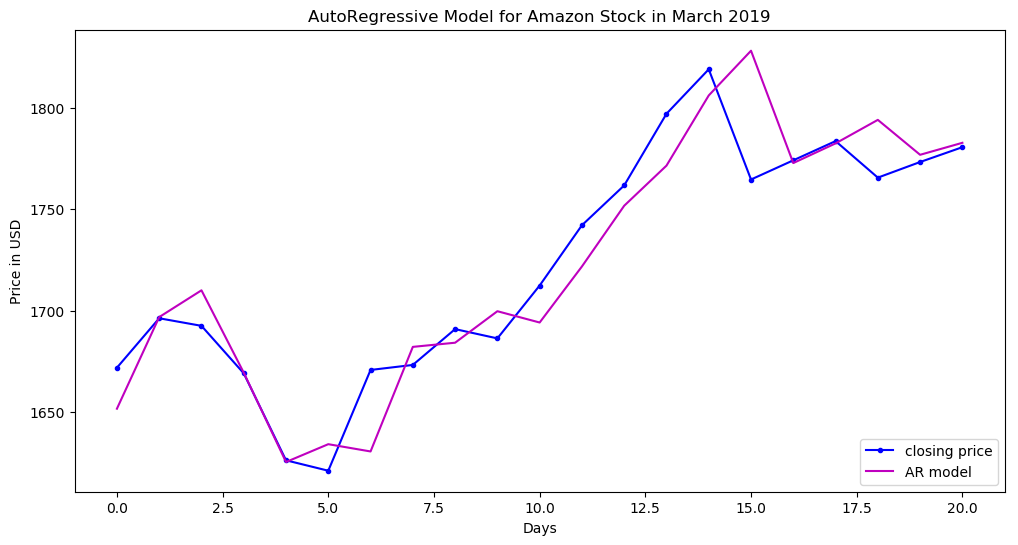

In [24]:
using PyPlot;
figure(figsize=(12,6));
plot(close_price,"b.-",yestAR,"m-");
legend(["closing price", "AR model"], loc="lower right");
title("AutoRegressive Model for Amazon Stock in March 2019");
xlabel("Days");
ylabel("Price in USD");


### Strategy ###

As previously stated, traders often utilize some derivative of the moving average model (source: https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp). The autoregressive model indicates when to buy and sell stock when the prediction curve crosses the actual data. For example the first time the AR model cross the closing price curve, it would indicate to the trader to sell his/her stock. The next time the AR model crosses the closing price, the trader would then buy the stock, and repeat this process. 

In [1]:
# this is a code block
using JuMP, Clp
m = Model(solver = ClpSolver())

things = [:horses, :donkeys, :goats]  # these are the things 
@variable(m, x[things] >= 0)          # the quantities of each of the things (can't be negative)
@constraint(m, sum(x) <= 10)          # we can't have any more than 10 things total
@objective(m, Max, x[:horses])        # we want to maximize the number of horses
solve(m)

for i in things
    println("The total number of ", i, " is: ", getvalue(x[i]))     # print result
end

The total number of horses is: 10.0
The total number of donkeys is: 0.0
The total number of goats is: 0.0


Remember to make sure your code compiles! I will be running your code!

## 4. Regularization ##

Here, you display and discuss the results. Show figures, plots, images, trade-off curves, or whatever else you can think of to best illustrate your results. The discussion should explain what the results mean, and how to interpret them. You should also explain the limitations of your approach/model and how sensitive your results are to the assumptions you made.

Use plots (see `PyPlot` examples from class), or you can display results in a table like this:

| Tables        | Are           | Cool  |
| ------------- |:-------------:| -----:|
| col 3 is      | right-aligned |\$1600 |
| col 2 is      | centered      |  \$12 |
| zebra stripes | are neat      |   \$1 |


## 5. Conclusion ##

Summarize your findings and your results, and talk about at least one possible future direction; something that might be interesting to pursue as a follow-up to your project.